In [1]:
import tensorflow as tf
# Ture가 나와야 GPU가 작동 되는 중 !
from tensorflow.python.client import device_lib 
device_lib.list_local_devices() 
#tf.config.list_physical_devices('GPU')


2021-08-08 14:56:27.361797: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-08-08 14:56:29.545720: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 978113118914522998,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10308909824
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7334035523508379383
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1",
 name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 10759480320
 locality {
   bus_id: 2
   numa_node: 1
   links {
   }
 }
 incarnation: 13183660936454129350
 physical_device_desc: "device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:81:00.0, compute capability: 6.1"]

2021-08-08 14:56:29.555881: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-08-08 14:56:30.141742: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6325GHz coreCount: 28 deviceMemorySize: 10.90GiB deviceMemoryBandwidth: 451.17GiB/s
2021-08-08 14:56:30.142705: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6325GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2021-08-08 14:56:30.142742: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-08-08 14:56:30.179789: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic libra

In [6]:
image_num = [1,10]       # 전체 이미지
train_image_num = [1]    # 트레이닝 이미지 범위 [1, 2, 3, 4, 5, 6, 7, 8]
test_image_num = 10                           # 테스트 이미지 숫자 [0]
X_shape = [10, 11]                            # X 형태 [행, 열] -> 트레이닝 크기
y_shape = 12                                  # y 형태 -> 트레이닝 결과 크기
y_test_range = [110,122]#[100, 115]                     # y_test 예측 범위 [120 ~ 125]
epoch = 100                                  # epoch 횟수

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from tensorflow.keras import datasets, layers, models

for num in image_num: 
    globals()['df{}'.format(num)] = pd.read_table('../images/Realigned_sino/Rsino_{}.txt'.format(num),sep=',', header = None)
    globals()['df{}'.format(num)] = globals()['df{}'.format(num)] / math.ceil(globals()['df{}'.format(num)].max().max())

# train셋, test셋으로 나누어 줍니다. X는 입력 변수, y는 출력 변수
X_train_org, X_test_org, y_train_org, y_test_org = [], [], [], []


In [11]:

# X 형태 (3+3, 6), y 형태 (5)
for num in train_image_num:
    for i in range(360 - X_shape[1]):                             # i, 열, 1
        for j in range(256 - X_shape[0] - y_shape):                # j, 행, 0
            X_train_org.append(pd.concat([globals()['df{}'.format(num)].iloc[j:j+int(X_shape[0]/2), 0+i:X_shape[1]+i], globals()['df{}'.format(num)].iloc[j+int(X_shape[0]/2)+y_shape:j+int(X_shape[0]/2)+y_shape+int(X_shape[0]/2), 0+i:X_shape[1]+i]], axis = 0))           # 아래
            if X_shape[1] % 2 == 0:
                y_train_org.append(globals()['df{}'.format(num)].iloc[j+int(X_shape[0]/2):j+int(X_shape[0]/2)+y_shape, i+int(X_shape[1]/2)])
            else:
                y_train_org.append(globals()['df{}'.format(num)].iloc[j+int(X_shape[0]/2):j+int(X_shape[0]/2)+y_shape, i+int(X_shape[1]/2)+1])

for i in range(360 - X_shape[1]):
    X_test_org.append(pd.concat([globals()['df{}'.format(test_image_num)].iloc[y_test_range[0] - int(X_shape[0]/2):y_test_range[0], 0+i:X_shape[1]+i], globals()['df{}'.format(test_image_num)].iloc[y_test_range[1]:y_test_range[1] + int(X_shape[0]/2), 0+i:X_shape[1]+i]], axis = 0))
    if X_shape[1] % 2 == 0:
        y_test_org.append(globals()['df{}'.format(test_image_num)].iloc[y_test_range[0]:y_test_range[1], i+int(X_shape[1]/2)])
    else:
        y_test_org.append(globals()['df{}'.format(test_image_num)].iloc[y_test_range[0]:y_test_range[1], i+int(X_shape[1]/2)+1])

X_train_org, X_test_org, y_train_org, y_test_org = np.array(X_train_org), np.array(X_test_org), np.array(y_train_org), np.array(y_test_org)

# RGB 값을 추가 합니다. 우선 흑백으로 설정 하였습니다.
# train 형태 : ((8*354*245, 6, 6, 1)), test 형태 : ((354, 6, 6, 1))
# tensorflow는 3차원만 지원하므로 3차원 형태로 reshape 해줘야 합니다.
X_train = X_train_org.reshape((len(train_image_num)*(360-X_shape[1])*(256-X_shape[0]-y_shape), X_shape[0], X_shape[1], 1))
X_test = X_test_org.reshape(((360-X_shape[1]), X_shape[0], X_shape[1], 1))
y_train = y_train_org
y_test = y_test_org



In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_shape[0], X_shape[1], 1)))
# MaxPooling2D(filter)
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_shape))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 9, 32)          320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 7, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                172096    
_________________________________________________________________
dense_3 (Dense)              (None, 12)                780       
Total params: 191,692
Trainable params: 191,692
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model 구성
model.compile(optimizer='adam',
            loss='mse',
            metrics=['accuracy'])

model.fit(X_train, y_train, epochs=epoch, verbose = 2)




Epoch 1/100
2553/2553 - 12s - loss: 9.1575e-04 - accuracy: 0.3897
Epoch 2/100
2553/2553 - 11s - loss: 3.3764e-04 - accuracy: 0.4381
Epoch 3/100
2553/2553 - 11s - loss: 2.7569e-04 - accuracy: 0.4630
Epoch 4/100
2553/2553 - 11s - loss: 2.4254e-04 - accuracy: 0.4772
Epoch 5/100
2553/2553 - 11s - loss: 2.0119e-04 - accuracy: 0.4986
Epoch 6/100
2553/2553 - 11s - loss: 1.7639e-04 - accuracy: 0.5069
Epoch 7/100
2553/2553 - 11s - loss: 1.6581e-04 - accuracy: 0.5084
Epoch 8/100
2553/2553 - 11s - loss: 1.4324e-04 - accuracy: 0.5187
Epoch 9/100
2553/2553 - 11s - loss: 1.3247e-04 - accuracy: 0.5004
Epoch 10/100
2553/2553 - 11s - loss: 1.3114e-04 - accuracy: 0.5235
Epoch 11/100
2553/2553 - 11s - loss: 1.1604e-04 - accuracy: 0.4944
Epoch 12/100
2553/2553 - 11s - loss: 1.1558e-04 - accuracy: 0.5050
Epoch 13/100
2553/2553 - 12s - loss: 1.1130e-04 - accuracy: 0.4930
Epoch 14/100
2553/2553 - 12s - loss: 1.1184e-04 - accuracy: 0.5192
Epoch 15/100
2553/2553 - 12s - loss: 1.0628e-04 - accuracy: 0.5081
Epoc

ValueError: in user code:

    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1233 test_function  *
        return step_function(self, iterator)
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1217 run_step  **
        outputs = model.test_step(data)
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1185 test_step
        self.compiled_loss(
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:1198 mean_squared_error
        return K.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/ops/gen_math_ops.py:10250 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/framework/op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/framework/func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/framework/ops.py:3528 _create_op_internal
        ret = Operation(
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/framework/ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /home/user/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 12 and 11 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_1/dense_3/BiasAdd, IteratorGetNext:1)' with input shapes: [?,12], [?,11].


Epoch 1/100
2520/2520 - 12s - loss: 0.0011 - accuracy: 0.3492
Epoch 2/100
2520/2520 - 11s - loss: 4.1824e-04 - accuracy: 0.3443
Epoch 3/100
2520/2520 - 11s - loss: 3.4670e-04 - accuracy: 0.4096
Epoch 4/100
2520/2520 - 11s - loss: 2.9539e-04 - accuracy: 0.4276
Epoch 5/100
2520/2520 - 11s - loss: 2.5893e-04 - accuracy: 0.4523
Epoch 6/100
2520/2520 - 11s - loss: 2.4549e-04 - accuracy: 0.4511
Epoch 7/100
2520/2520 - 11s - loss: 2.1819e-04 - accuracy: 0.4396
Epoch 8/100
2520/2520 - 11s - loss: 2.1763e-04 - accuracy: 0.4218
Epoch 9/100
2520/2520 - 11s - loss: 1.9632e-04 - accuracy: 0.4236
Epoch 10/100
2520/2520 - 11s - loss: 1.9293e-04 - accuracy: 0.4280
Epoch 11/100
2520/2520 - 11s - loss: 1.8438e-04 - accuracy: 0.4289
Epoch 12/100
2520/2520 - 11s - loss: 1.8146e-04 - accuracy: 0.4287
Epoch 13/100
2520/2520 - 11s - loss: 1.6945e-04 - accuracy: 0.4322
Epoch 14/100
2520/2520 - 11s - loss: 1.6789e-04 - accuracy: 0.4260
Epoch 15/100
2520/2520 - 11s - loss: 1.5770e-04 - accuracy: 0.4477
Epoch 16

In [12]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)      # test 데이터를 넣었을 때의 loss, acc
print(test_acc)   # 정확도

# 모델 예측
pred = model.predict(X_test)    # 예측 데이터를 ()안에 넣으면 됩니다.


11/11 - 0s - loss: 0.4759 - accuracy: 0.6361
0.6361031532287598


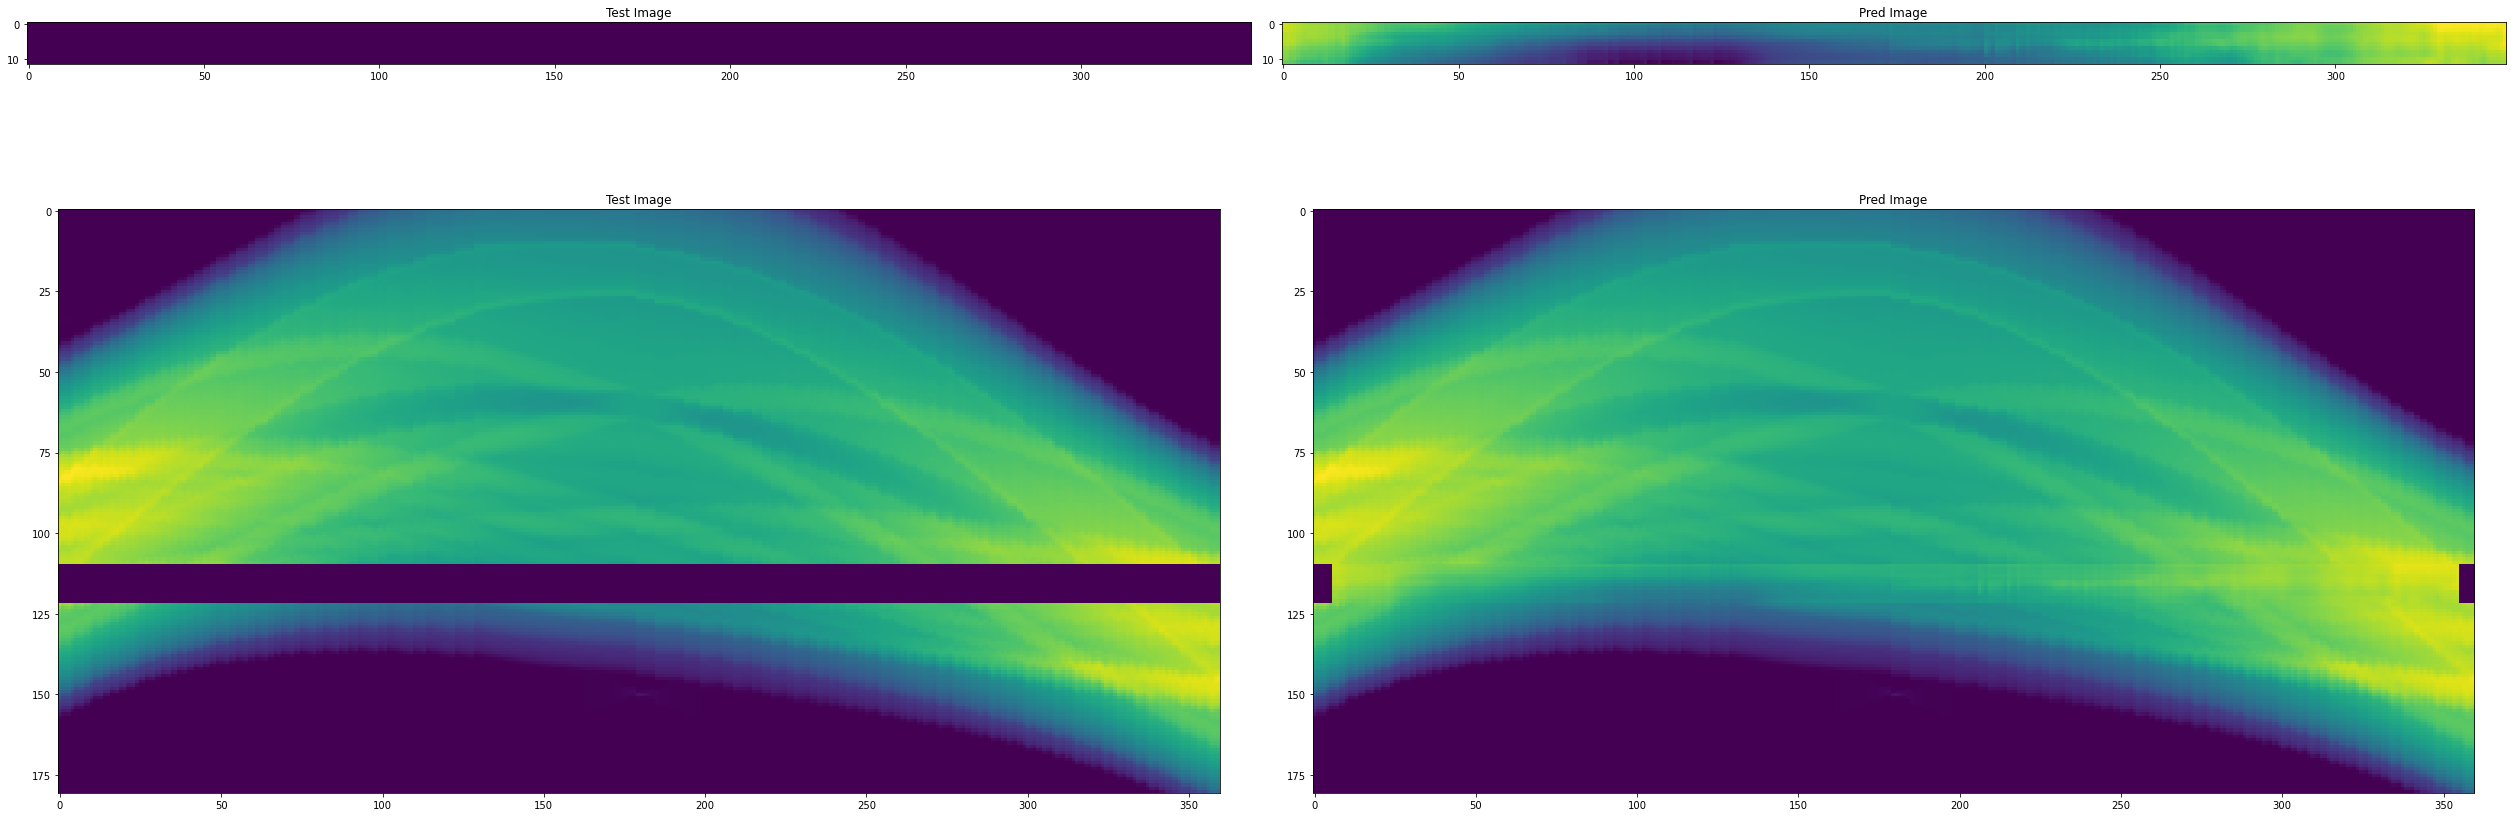

In [13]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize = (35, 15))
axes[0][0].set_title('Test Image')
axes[0][0].imshow(y_test_org.T)
axes[0][1].set_title('Pred Image')
axes[0][1].imshow(pred.T)
axes[1][0].set_title('Test Image')
axes[1][0].imshow(globals()['df{}'.format(test_image_num)])
df_test_img = globals()['df{}'.format(test_image_num)]
if X_shape[1] % 2 == 0:
    df_test_img.iloc[y_test_range[0]:y_test_range[1], 0+int(X_shape[1]/2):360-int(X_shape[1]/2)] = pred.T
else:
    df_test_img.iloc[y_test_range[0]:y_test_range[1], 0+int(X_shape[1]/2)+1:360-int(X_shape[1]/2)] = pred.T
axes[1][1].set_title('Pred Image')
axes[1][1].imshow(df_test_img)
figure.colorbar;

figure.tight_layout()
plt.show()

In [25]:
print(pred.T.shape)

(15, 349)


In [24]:
import scipy.io as sio
sio.savemat('df_test_imgNum9_len15y10_tnum8.mat',{'values':df_test_img.values})